In [71]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

from scipy import special

# Introduction

At first glance the perceptron bears many similarities with ordinary Linear Regression in that it can learn linearly separable patterns. Two things that differentiate the perceptron from Linear Regression though, are the "activation function" and how the weights are set. 
- Whereas the parameters of Linear Regressors tend to be set using ordinary least squares (OLS) perceptrons are "trained" using gradient descent. We've learned that initializing weights randomly is important for training. However, this has the consequence that a perceptron can potentially have different scores after training depending on what weights it started with - though this is really only a concern for low dimensional problems.
- A perceptron is usually paired with an "activation function" which can introduce nonlinearity into the model. Essentially the activation function takes the output of a perceptron and maps it to something like a sigmoid function, a hyperbolic tangent function, or some other differentiable function.

In [110]:
# Let us implement a perceptron from scratch
# to see what the algorithm is like

class Perceptron:
  
    # just like linear regression we have a weight and a bias
    def __init__ (self, act):
        self.w = None    # weight
        self.b = None    # bias
     
    # return a binary classifier model with a step activation function 
    # 
    def model(self, x):
        return 1 if (np.dot(self.w, x) >= self.b) else 0
  
    # predict using the linear model
    def predict(self, X):
        ŷ = []
        for x in X:
            result = self.model(x)
            ŷ.append(result)
        return np.array(ŷ)
    
    def fit(self, X, Y, epochs = 1, lr = 1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy = {}
        max_accuracy = 0
        wt_matrix = []
        
        # run through dataset as many times as we specify "epochs"
        for i in range(epochs):
            for x, y in zip(X, Y):
                ŷ = self.model(x)
                # adjust weights
                if y == 1 and ŷ == 0:
                    self.w = self.w + lr * x
                    self.b = self.b - lr * 1
                elif y == 0 and ŷ == 1:
                    self.w = self.w - lr * x
                    self.b = self.b + lr * 1
  
            wt_matrix.append(self.w)    
            accuracy[i] = accuracy_score(self.predict(X), Y)
            if (accuracy[i] > max_accuracy):
                max_accuracy = accuracy[i]
                chkptw = self.w
                chkptb = self.b
        #checkpoint (Save the weights and b value)
        self.w = chkptw
        self.b = chkptb

        #return the weight matrix, that contains weights over all epochs
        return np.array(wt_matrix)

In [13]:
# let's load a small dataset to try it out with
#load the breast cancer data
breast_cancer = datasets.load_breast_cancer()

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [14]:
#convert the data to pandas dataframe.

data = pd.DataFrame(breast_cancer.data, columns = breast_cancer.feature_names)
data["class"] = breast_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
# notice that the magnitudes of the values are very different
# the mean radius is 14
# the mean smoothness is 0.09
# the mean worst area is 880

data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [17]:
# to help the Perceptron learn more efficiently, we will scale these values
# using a minmaxscalerwhich normalizes values between 0 and 1

from sklearn.preprocessing import MinMaxScaler

#perform scaling on the data.
X = data.drop("class", axis = 1)
Y = data["class"]
mnscaler = MinMaxScaler()
X = mnscaler.fit_transform(X)
X = pd.DataFrame(X, columns=data.drop("class",axis = 1).columns)

#train test split.
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, stratify = Y, random_state = 1)

In [19]:
# now all the values are normalized 

X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# let us begin with an activation function which is simply the identity

def ident(x):
    return x

m = Perceptron(ident)

wt_matrix = m.fit(np.array(X_train), np.array(Y_train), 300, 0.3)

print(accuracy_score(m.predict(np.array(X_test)), np.array(Y_test)))

# we score quite well

0.9649122807017544


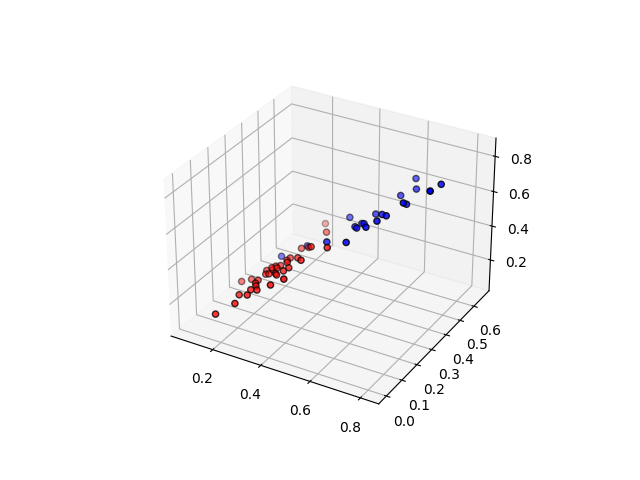

In [91]:
# let us investigate the dataset

# when we have high dimensional datasets it's not always easy to plot them
# in such a way that it becomes clear how to linearly separate classes
# try visualizing different columns to see how the two classes are separable

# how many dimensions do you think we need in order to score well on this dataset?

# clear old visualizations
plt.close('all')

# visualize the points
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], c=Y_test, cmap='bwr', s=20, edgecolors="k")

In [97]:
# based on the image above it seems like the first two variables should suffice

m = Perceptron(ident)

wt_matrix = m.fit(np.array(X_train.iloc[:,0:2]), np.array(Y_train), 300, 0.3)

print(accuracy_score(m.predict(np.array(X_test.iloc[:,0:2])), np.array(Y_test)))

# look at that! the model scores well despite only including 3 columns of data

0.9473684210526315


# Multiclass Perceptron

In [101]:
# let us grab a dataset that is slightly more complex just to see the difference in activation functions

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

X, Y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

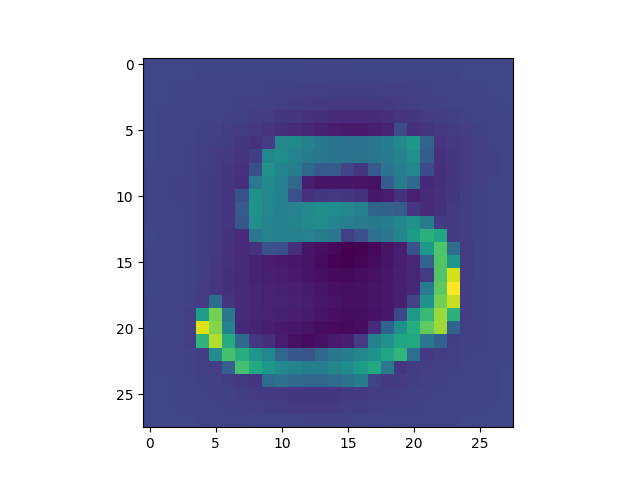

In [106]:
# MNIST is a dataset of handwritten digits
# it will be (slightly) more difficult for our perceptron to classify correctly

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.imshow(X_train[0].reshape((28,28)))

In [112]:
# let's start off by using the Perceptron provided by Scikit Learn
from sklearn.linear_model import Perceptron

m = Perceptron(max_iter=300, eta0=0.3, n_jobs=-1)

m.fit(X_train, Y_train)

accuracy_score(m.predict(X_test), Y_test)

# there is a fairly hard limit on what score we can achieve with a single layer perceptron

0.8832857142857143

In [128]:
# let's see what we can achieve by combining two layers of perceptrons
from sklearn.neural_network import MLPClassifier

m = MLPClassifier(hidden_layer_sizes=(32), max_iter = 30, 
                  activation = 'tanh', solver = 'adam', verbose=1, n_jobs=-1)

m.fit(X_train, Y_train)

Iteration 1, loss = 0.49578089
Iteration 2, loss = 0.25552527
Iteration 3, loss = 0.20595543
Iteration 4, loss = 0.17689990
Iteration 5, loss = 0.15638677
Iteration 6, loss = 0.14104907
Iteration 7, loss = 0.12817191
Iteration 8, loss = 0.11804777
Iteration 9, loss = 0.10929485
Iteration 10, loss = 0.10190875
Iteration 11, loss = 0.09498571
Iteration 12, loss = 0.08931687
Iteration 13, loss = 0.08439349
Iteration 14, loss = 0.07893806
Iteration 15, loss = 0.07484817
Iteration 16, loss = 0.07096245
Iteration 17, loss = 0.06719289
Iteration 18, loss = 0.06355727
Iteration 19, loss = 0.06044367
Iteration 20, loss = 0.05786323
Iteration 21, loss = 0.05490476
Iteration 22, loss = 0.05240458
Iteration 23, loss = 0.04999205
Iteration 24, loss = 0.04746489
Iteration 25, loss = 0.04595591
Iteration 26, loss = 0.04385359
Iteration 27, loss = 0.04154355
Iteration 28, loss = 0.04033387
Iteration 29, loss = 0.03780654
Iteration 30, loss = 0.03669390


/home/r3tex/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=32, max_iter=30, verbose=1)

In [129]:
accuracy_score(m.predict(X_test), Y_test)

0.9437142857142857

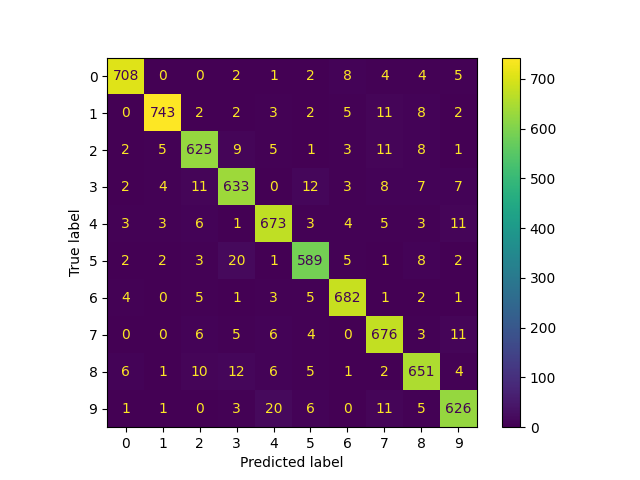

In [135]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(m.predict(X_test), Y_test)).plot()